In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.decomposition import PCA

In [2]:
missing_values = ["n.a.","NA","n/a", "na","-","?"," " ] 
cars1=pd.read_csv("C://Users//mahes//Downloads//Part1+-+Car+name.csv",na_values = missing_values)

In [3]:
missing_values = ["n.a.","NA","n/a", "na","-"," " ]
car_attr=pd.read_json("C://Users//mahes//Downloads//Part1+-+Car-Attributes.json")

In [4]:
cars1.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [5]:

car_attr.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


Merge both the DataFrames together to form a single DataFrame

In [6]:
car_canct=pd.concat([cars1, car_attr], axis=1, join="inner")

In [7]:
car_canct.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [8]:
car_canct.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Data Preparation & Analysis

In [9]:
car_canct.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [10]:
for value in ['car_name','hp','mpg','cyl','disp','wt','acc','yr','origin']:
    print(value,":", sum(car_canct[value] == '?'))

car_name : 0
hp : 6
mpg : 0
cyl : 0
disp : 0
wt : 0
acc : 0
yr : 0
origin : 0


In [11]:
car_canct = car_canct.replace('?', np.nan)

In [12]:
car_canct.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [13]:
car_canct['hp'] = car_canct['hp'].fillna(car_canct['hp'].mode()[0])

In [14]:
car_canct.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

In [15]:
car_canct.shape

(398, 9)

In [16]:
car_canct.duplicated().sum()

0

There is no duplicate data found in the record

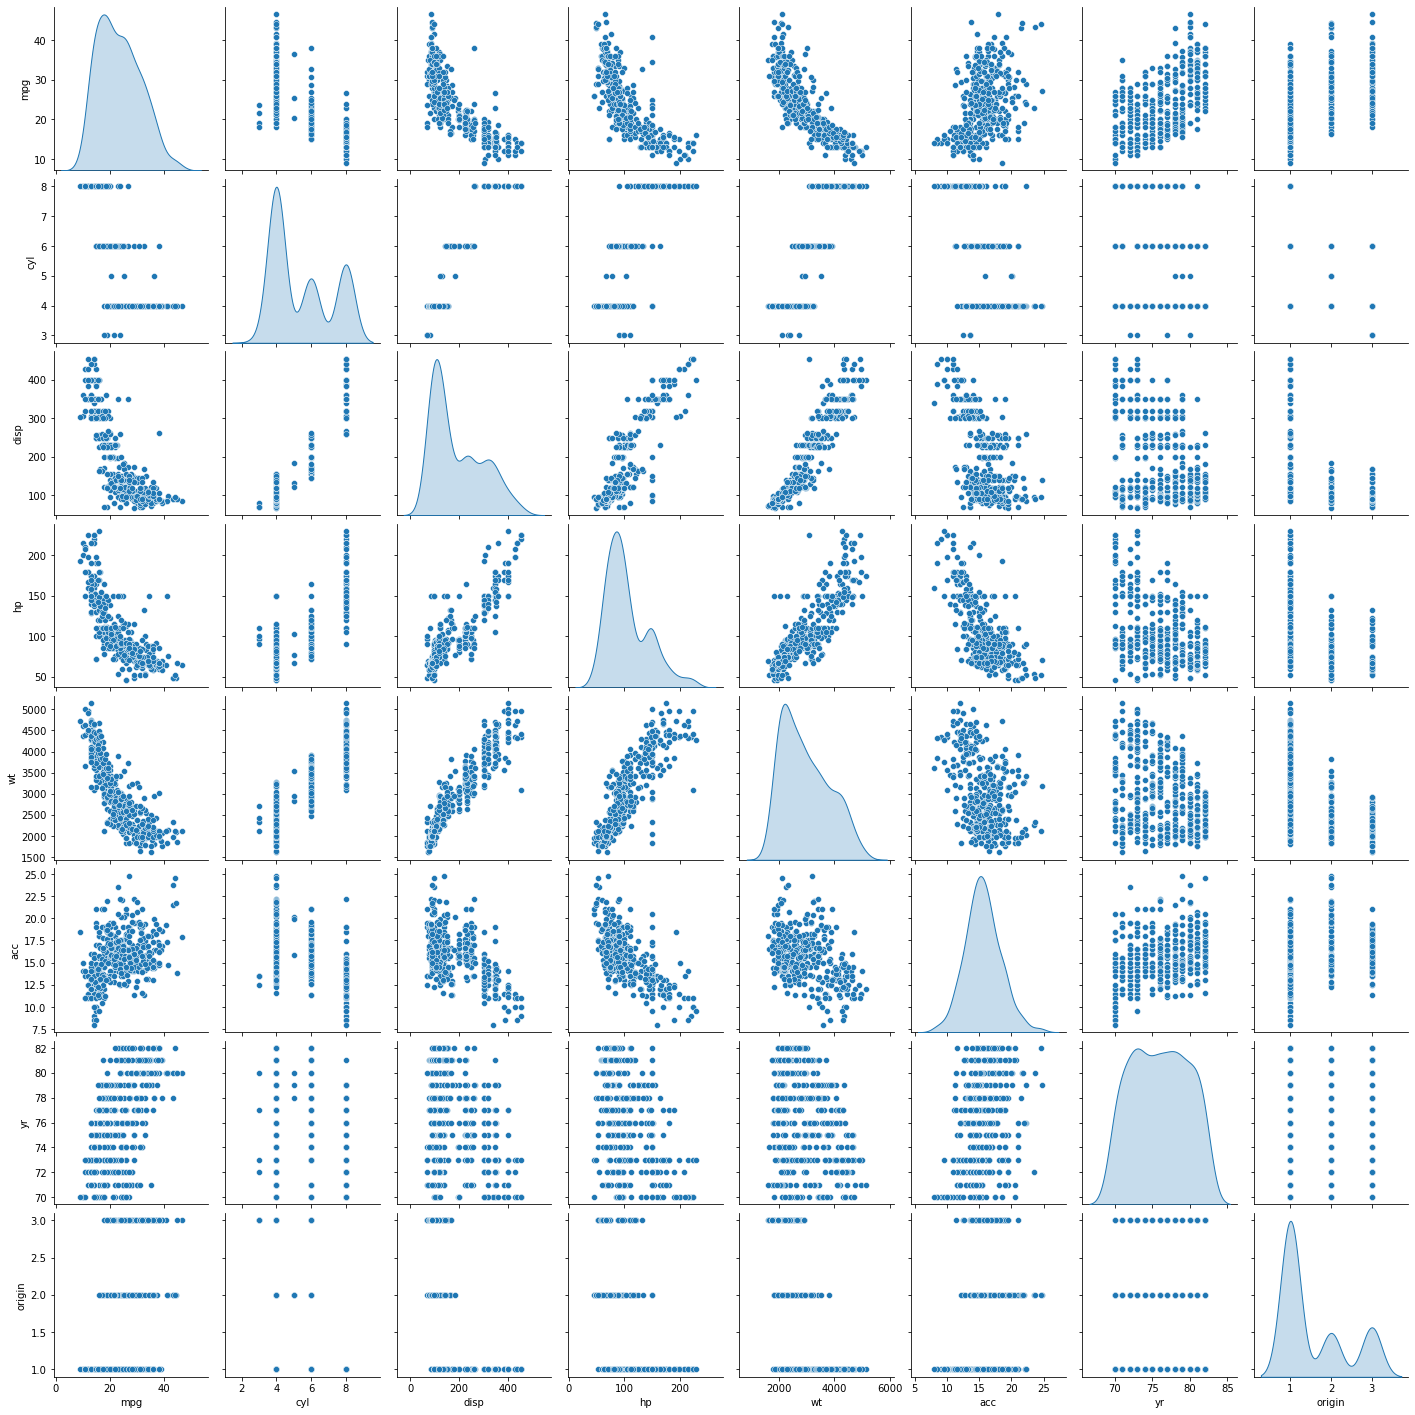

In [17]:
sns.pairplot(car_canct,diag_kind='kde')

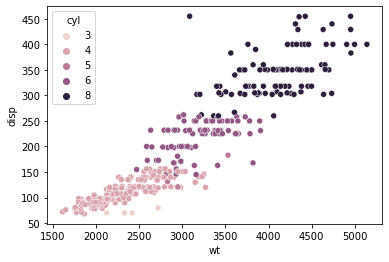

In [18]:
sns.scatterplot(data=car_canct, x='wt', y='disp', hue='cyl');

From the above scatter plot i can conclude that weight and displacement are postively corelatter
As the value increases the cylinder value also varies 
say  for the lower bunch of group the cylider is of 4 and strongly corelated


<AxesSubplot:xlabel='wt', ylabel='mpg'>

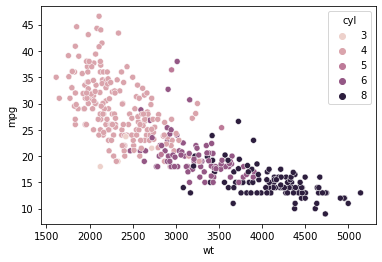

In [19]:
sns.scatterplot(data=car_canct, x='wt', y='mpg', hue='cyl')

From the above scatter plot i can conclude that weight and mpg are negatively corelatted
As the value decreases the cylinder value also varies 
say  for the lower bunch of group the cylider is of 4 and strongly corelated


Check for unexpected values in all the features is alread checked in earlier stages doing the same again to cross check 

In [20]:
for value in ['car_name','hp','mpg','cyl','disp','wt','acc','yr','origin']:
    print(value,":", sum(car_canct[value] == '?'))

car_name : 0
hp : 0
mpg : 0
cyl : 0
disp : 0
wt : 0
acc : 0
yr : 0
origin : 0


Clustering

In [21]:
car_colmn=car_canct.iloc[:,1:]
car_scaled=car_colmn.apply(zscore)

C:\Users\mahes\anaconda3\an\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\mahes\anaconda3\an\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\mahes\anaconda3\an\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\mahes\anaconda3\an\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory le

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

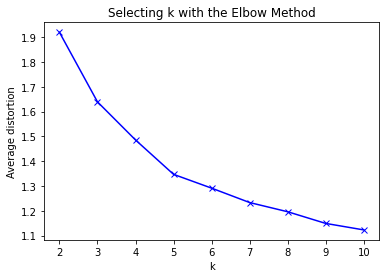

In [22]:
from scipy.spatial.distance import cdist
clusters=range(2,11)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(car_scaled)
    prediction=model.predict(car_scaled)
    meanDistortions.append(sum(np.min(cdist(car_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / car_scaled.shape[0])
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

From the above graph the K drop which i can conclude from the elbow graph is 3 and 5

In [23]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(car_scaled)
prediction=final_model.predict(car_scaled)

#Append the prediction 
car_canct["GROUP"] = prediction
car_scaled["GROUP"] = prediction
print("Groups Assigned : \n")
car_canct.head()

C:\Users\mahes\anaconda3\an\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Groups Assigned : 



,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,1


In [24]:
car_Clust = car_canct.groupby(['GROUP'])
car_Clust.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
GROUP,,,,,,,,
0,30.52795,4.068323,103.422360,78.074534,2234.720497,16.311801,77.155280,2.341615
1,14.71500,7.980000,346.370000,160.550000,4126.910000,12.721000,73.750000,1.000000
2,21.69562,5.240876,187.558394,96.547445,2990.861314,16.772263,76.313869,1.087591


array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'origin'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[GROUP]'>]],
      dtype=object)

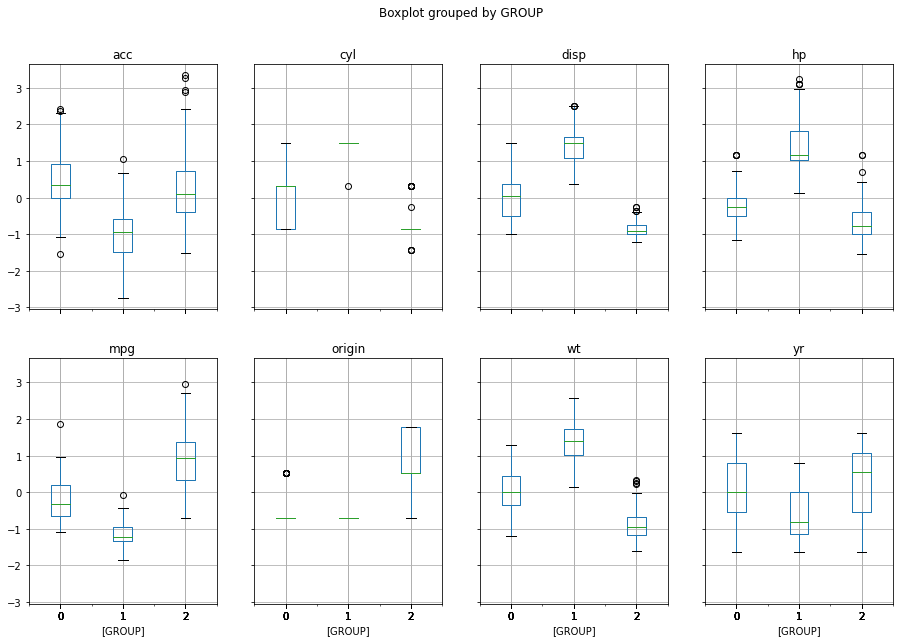

In [25]:
car_scaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [25]:
 #Let us first start with K = 5
final_model=KMeans(5)
final_model.fit(car_scaled)
prediction=final_model.predict(car_scaled)

#Append the prediction 
car_canct["GROUP"] = prediction
car_scaled["GROUP"] = prediction
print("Groups Assigned : \n")
car_canct.head()

C:\Users\mahes\anaconda3\an\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Groups Assigned : 



,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,1


In [26]:
car_Clust = car_canct.groupby(['GROUP'])
car_Clust.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
GROUP,,,,,,,,
0,24.837097,4.193548,137.411290,92.064516,2651.677419,16.782258,77.290323,1.145161
1,14.528866,7.979381,348.020619,161.804124,4143.969072,12.641237,73.628866,1.000000
2,26.078667,4.026667,102.066667,82.440000,2245.760000,15.958667,73.853333,2.493333
3,19.161538,6.179487,231.474359,101.012821,3282.948718,16.707692,75.589744,1.038462
4,34.408140,4.104651,104.604651,74.267442,2225.093023,16.619767,80.034884,2.209302


array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'origin'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[GROUP]'>]],
      dtype=object)

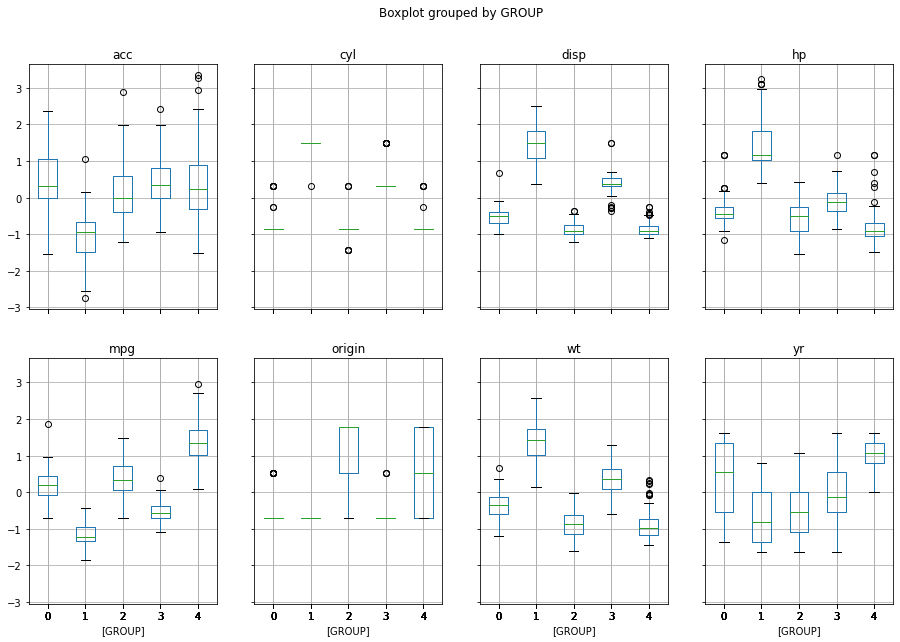

In [27]:
car_scaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [28]:
df2 = {'car_name':'Amaze',
        'mpg':19.6,
        'cyl':8,
        'disp':345.7867,
        'hp':89.3333334,
        'wt':5634.333432,
        'acc':12.721000,
        'yr':73.185185,
        'origin':2.148148
       }
car_canct= car_canct.append(df2, ignore_index = True)

C:\Users\mahes\AppData\Local\Temp\ipykernel_32460\3721745535.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  car_canct= car_canct.append(df2, ignore_index = True)


In [29]:
car_canct.shape

(399, 10)

From the above it is clear that new data is added

In [30]:
car_canct.tail()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
394,vw pickup,44.0,4,97.0000,52.000000,2130.000000,24.600,82.000000,2.000000,4.0
395,dodge rampage,32.0,4,135.0000,84.000000,2295.000000,11.600,82.000000,1.000000,4.0
396,ford ranger,28.0,4,120.0000,79.000000,2625.000000,18.600,82.000000,1.000000,0.0
397,chevy s-10,31.0,4,119.0000,82.000000,2720.000000,19.400,82.000000,1.000000,0.0
398,Amaze,19.6,8,345.7867,89.333333,5634.333432,12.721,73.185185,2.148148,NaN


PART B

In [31]:
missing_values = ["n.a.","NA","n/a", "na","-","?"," " ]
df=pd.read_csv("C://Users//mahes//Downloads//vehicle.csv",na_values=missing_values)

In [32]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [33]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [34]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [35]:
df = df.fillna(df.mean())

C:\Users\mahes\AppData\Local\Temp\ipykernel_32460\114435927.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [36]:
df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

<AxesSubplot:ylabel='class'>

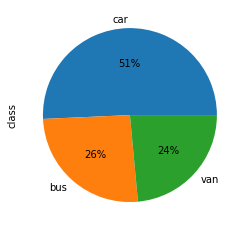

In [37]:
ax = df['class'].value_counts()
ax.plot(kind='pie',autopct='%.0f%%')
ax.plot()

In [38]:
df.duplicated().sum()

0

Data Preparation

In [39]:
X=df.drop(['class'],axis=1)
Y=df['class']

In [40]:
x_scaled=X.apply(zscore)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, Y, test_size=0.20, random_state=1)

Q3. Model Building

In [42]:
clf = svm.SVC(gamma=0.025, C=3) 

In [43]:
clf.fit(X_train , y_train)

SVC(C=3, gamma=0.025)

In [44]:
y_pred = clf.predict(X_test)

In [45]:
print(clf.score(X_test,y_test))  

0.9764705882352941


In [46]:
from sklearn import metrics

In [47]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         bus       0.97      1.00      0.99        37
         car       0.99      0.97      0.98        90
         van       0.95      0.98      0.97        43

    accuracy                           0.98       170
   macro avg       0.97      0.98      0.98       170
weighted avg       0.98      0.98      0.98       170



In [48]:
covMatrix = np.cov(x_scaled,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68623251  0.79084412  0.69065619  0.09181254  0.14842463
   0.81319623 -0.78957587  0.81459888  0.67694334  0.76367265  0.81686705
   0.58584865 -0.25036693  0.23596607  0.15757316  0.2988797   0.36598446]
 [ 0.68623251  1.00118343  0.79395399  0.62170187  0.15354334  0.25150523
   0.84921058 -0.82287347  0.84597164  0.96308094  0.7977645   0.83951746
   0.92798524  0.05270433  0.14456452 -0.01186527 -0.1057698   0.04537164]
 [ 0.79084412  0.79395399  1.00118343  0.76798667  0.15858456  0.26486339
   0.90547061 -0.91251368  0.89418513  0.77558624  0.86300031  0.88837793
   0.70678835 -0.2261194   0.1139479   0.26586756  0.14573497  0.3324884 ]
 [ 0.69065619  0.62170187  0.76798667  1.00118343  0.6643445   0.45056889
   0.73509724 -0.79072934  0.70912305  0.56987817  0.79498064  0.72100219
   0.5371705  -0.1810333   0.04877731  0.17403799  0.38258162  0.47181974]
 [ 0.09181254  0.15354334  0.15858456  0.6643445   1.00118343  0.64947191
   0.1038381  -0.18348087  0.07948

In [49]:
pca = PCA(n_components=10)
pca.fit(x_scaled)

PCA(n_components=10)

Eigen values

In [50]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(X_train.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00828811  0.68339492  0.80236789  0.69529156  0.0807878   0.14039109
   0.8192747  -0.78957773  0.82187686  0.67399942  0.7679012   0.82500446
   0.58695914 -0.26210519  0.22604751  0.1557202   0.2977855   0.37261884]
 [ 0.68339492  0.99427671  0.8011146   0.62674657  0.15104792  0.24325155
   0.8508853  -0.82514285  0.84563527  0.94897555  0.80500025  0.84238946
   0.92663168  0.04170772  0.14062388 -0.00830121 -0.09934123  0.05233743]
 [ 0.80236789  0.8011146   1.02179857  0.78659176  0.15639799  0.25948857
   0.92096525 -0.92771365  0.90981741  0.77781347  0.88149928  0.90561271
   0.7192932  -0.24647508  0.11426767  0.27927707  0.16022276  0.35350646]
 [ 0.69529156  0.62674657  0.78659176  1.03294324  0.6980864   0.4911239
   0.74279483 -0.7970952   0.71674801  0.57062942  0.81996281  0.72943702
   0.54424887 -0.17045417  0.04216566  0.17942946  0.38703109  0.49039899]
 [ 0.0807878   0.15104792  0.15639799  0.6980864   1.07886758  0.7390636
   0.09026206 

In [51]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 51.60346655  68.23300148  79.87577303  86.40926355  91.23916244
  94.1721565   96.18809759  97.38399448  98.27757011  98.75536317
  99.11832124  99.37156818  99.56219873  99.71504437  99.83077738
  99.92574794  99.9796662  100.        ]


In [52]:
z=np.cumsum(pca.explained_variance_ratio_)*100

In [53]:
print(z)

[52.20648509 68.94253893 79.50492134 86.05424114 91.14362968 94.13608733
 96.12576859 97.35576702 98.24380605 98.75272648]


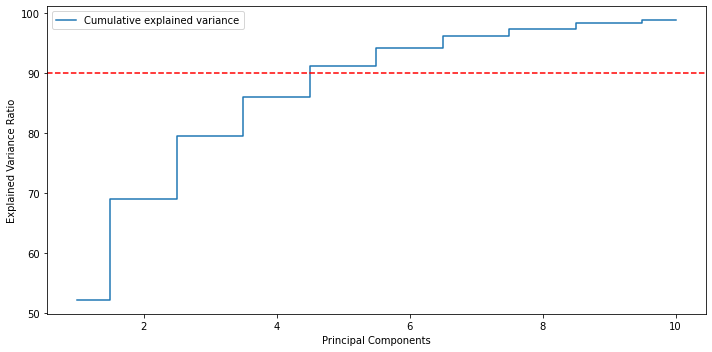

In [54]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
#plt.bar(range(1,11), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1,11),z, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.axhline(y=90, color='red', linestyle='--')
plt.show()

In [55]:
print("Eigen vectors:",pca.components_)

Eigen vectors: [[ 2.75259459e-01  2.93392341e-01  3.04556452e-01  2.67593206e-01
   8.04938998e-02  9.72198560e-02  3.16872006e-01 -3.14042361e-01
   3.13953009e-01  2.82790417e-01  3.09310530e-01  3.14149034e-01
   2.72002525e-01 -2.09179819e-02  4.13316728e-02  5.83331566e-02
   3.01560495e-02  7.40813666e-02]
 [-1.27010856e-01  1.26217125e-01 -7.26862818e-02 -1.89635192e-01
  -1.22158741e-01  1.07277825e-02  4.80473095e-02  1.27991503e-02
   6.00351423e-02  1.16182501e-01  6.17536908e-02  5.32757796e-02
   2.09279660e-01  4.88541866e-01 -5.49212020e-02 -1.24152855e-01
  -5.40947666e-01 -5.40279812e-01]
 [-1.19874162e-01 -2.51835016e-02 -5.60058748e-02  2.75066087e-01
   6.42046458e-01  5.91799912e-01 -9.76530949e-02  5.74645766e-02
  -1.09509169e-01 -1.69994013e-02  5.64656174e-02 -1.08711428e-01
  -3.13685232e-02  2.86211092e-01 -1.15693651e-01 -7.54878378e-02
   8.68929277e-03  3.95143108e-02]
 [ 7.83109159e-02  1.87525528e-01 -7.07959698e-02 -4.22567515e-02
   3.28577853e-02  3.1

In [56]:
print("Eigen values:",pca.explained_variance_)

Eigen values: [9.40828822 3.01605477 1.90347881 1.18027268 0.91717407 0.53927982
 0.35856646 0.22166173 0.16003619 0.09171409]


In [57]:
print("Percentage of variance:",pca.explained_variance_ratio_)

Percentage of variance: [0.52206485 0.16736054 0.10562382 0.0654932  0.05089389 0.02992458
 0.01989681 0.01229998 0.00888039 0.0050892 ]


Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained.

This time i am selecting 6 components

In [58]:
pca1 = PCA(n_components=6)
pca1.fit(x_scaled)

PCA(n_components=6)

In [59]:
print("Eigen vectors:",pca1.components_)

Eigen vectors: [[ 2.75259459e-01  2.93392341e-01  3.04556452e-01  2.67593206e-01
   8.04938998e-02  9.72198560e-02  3.16872006e-01 -3.14042361e-01
   3.13953009e-01  2.82790417e-01  3.09310530e-01  3.14149034e-01
   2.72002525e-01 -2.09179819e-02  4.13316728e-02  5.83331566e-02
   3.01560495e-02  7.40813666e-02]
 [-1.27010856e-01  1.26217125e-01 -7.26862818e-02 -1.89635192e-01
  -1.22158741e-01  1.07277825e-02  4.80473095e-02  1.27991503e-02
   6.00351423e-02  1.16182501e-01  6.17536908e-02  5.32757796e-02
   2.09279660e-01  4.88541866e-01 -5.49212020e-02 -1.24152855e-01
  -5.40947666e-01 -5.40279812e-01]
 [-1.19874162e-01 -2.51835016e-02 -5.60058748e-02  2.75066087e-01
   6.42046458e-01  5.91799912e-01 -9.76530949e-02  5.74645766e-02
  -1.09509169e-01 -1.69994013e-02  5.64656174e-02 -1.08711428e-01
  -3.13685232e-02  2.86211092e-01 -1.15693651e-01 -7.54878378e-02
   8.68929277e-03  3.95143108e-02]
 [ 7.83109159e-02  1.87525528e-01 -7.07959698e-02 -4.22567515e-02
   3.28577853e-02  3.1

In [60]:
print("Eigen values:",pca1.explained_variance_)

Eigen values: [9.40828822 3.01605477 1.90347881 1.18027268 0.91717407 0.53927982]


In [61]:
print("Eigen values:",pca1.explained_variance_ratio_)

Eigen values: [0.52206485 0.16736054 0.10562382 0.0654932  0.05089389 0.02992458]


In [62]:
z1=np.cumsum(pca1.explained_variance_ratio_)*100

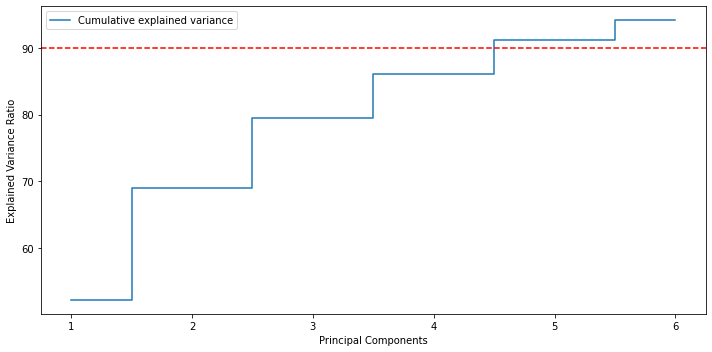

In [63]:
plt.figure(figsize=(10 , 5))
plt.step(range(1,7),z1, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.axhline(y=90, color='red', linestyle='--')
plt.show()

In [64]:
pca3=pca1.transform(x_scaled)

In [65]:
svm_pca = svm.SVC(gamma=0.025, C=3)
svm_pca.fit(pca3,Y)
svm_pca.score(pca3,Y)

0.8900709219858156

In [66]:
y_pred_pca =svm_pca.predict(pca3)

In [67]:
print(metrics.classification_report(Y,y_pred_pca))

              precision    recall  f1-score   support

         bus       0.89      0.86      0.88       218
         car       0.90      0.92      0.91       429
         van       0.86      0.87      0.86       199

    accuracy                           0.89       846
   macro avg       0.89      0.88      0.88       846
weighted avg       0.89      0.89      0.89       846



From the above classification matrix its is clear the score is 89 recall  is 88

4. Performance Improvement

In [68]:
from sklearn.svm import SVC

In [69]:
svm=SVC()
svm.fit(pca3,Y)
pre=svm.predict(pca3)
print(svm.score(pca3,Y))

0.9066193853427896


In [70]:
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(pca3,Y)
prediction = svc_model.predict(pca3)
#print(svc_model.score(X_test,y_test))
print("*****************************************")
print(svc_model.score(pca3,Y))

*****************************************
0.7860520094562647


In [71]:
svc_model = SVC(C= .01, kernel='linear', gamma= .01)
svc_model.fit(pca3,Y)
prediction1 = svc_model.predict(pca3)
#print(svc_model.score(X_test,y_test))
print("*****************************************")
print(svc_model.score(pca3,Y))

*****************************************
0.776595744680851


In [72]:
svc_model = SVC(C= .01, kernel='linear', gamma= .01)
svc_model.fit(pca3,Y)
prediction2 = svc_model.predict(pca3)
#print(svc_model.score(X_test,y_test))
print("*****************************************")
print(svc_model.score(pca3,Y))

*****************************************
0.776595744680851


From the above the best parameter is c=.1 and gamma is 1

In [73]:
print(metrics.classification_report(Y,prediction))

              precision    recall  f1-score   support

         bus       0.67      0.72      0.69       218
         car       0.86      0.79      0.82       429
         van       0.78      0.84      0.81       199

    accuracy                           0.79       846
   macro avg       0.77      0.78      0.78       846
weighted avg       0.79      0.79      0.79       846



In [74]:
cm = metrics.confusion_matrix(Y,prediction)

In [75]:
cm_df = pd.DataFrame(cm,
                     index = ['car','bus','van'], 
                     columns = ['car','bus','van'])

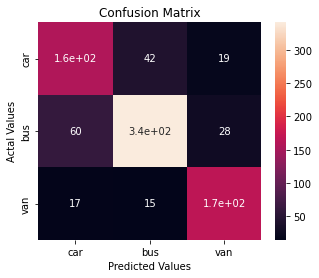

In [76]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

5. Data Understanding & Cleaning:

The concept of PCA is basically to reduce the number of dimension of data.In the data provided the the score in SVM model is 97 then by reducing the component to 6 i observe the score is 89 and after the tuning the score is 77. As the dimension reduces the score is also reduced. But the data dimenion is reduced so i feel the model is better tuned

Explain advantages and limitations of PCA. 